**étape 1**

In [1]:
import numpy as np

In [7]:
vehicules = [
    {'id': 1, 'position': np.array([500, 300]), 'disponible': True},
    {'id': 2, 'position': np.array([1200, 800]), 'disponible': True},
    {'id': 3, 'position': np.array([1800, 1500]), 'disponible': False},
    {'id': 4, 'position': np.array([2500, 2000]), 'disponible': True},
    {'id': 5, 'position': np.array([3000, 1000]), 'disponible': False},
    {'id': 6, 'position': np.array([4000, 3500]), 'disponible': True},
]

In [3]:
clients_en_attente = [
    {'id_client': 101, 'nom': 'nouha', 'position': np.array([1100, 750])},
    {'id_client': 102, 'nom': 'Fatima', 'position': np.array([1750, 1600])},
    {'id_client': 103, 'nom': 'Mehdi', 'position': np.array([600, 400])},
    {'id_client': 104, 'nom': 'Sara', 'position': np.array([2900, 1100])},
    {'id_client': 105, 'nom': 'mohamed', 'position': np.array([3900, 3600])},
    {'id_client': 106, 'nom': 'aya', 'position': np.array([2400, 2100])},
    {'id_client': 107, 'nom': 'lamya', 'position': np.array([1300, 900])},
]

étape 2

on va calculer la distance euclidienne

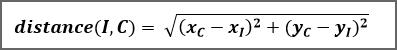

In [4]:
def calculer_distance(pos1, pos2):
    diff = pos1 - pos2
    distance = np.sqrt(np.sum(diff ** 2))
    return distance

In [5]:
#test de fct
pos1 = np.array([500, 300])
pos2 = np.array([1200, 800])
dist = calculer_distance(pos1, pos2)
print(f"la distance est {dist:.2f} m")

la distance est 860.23 m


étape 3

In [6]:
assignations = []

In [8]:
for client in clients_en_attente:
    print(f"pour le client: {client['nom']} ")

    # filtrage
    vehicules_dispos = list(filter(lambda v: v['disponible'], vehicules))
    nbr_dispos = len(vehicules_dispos)
    print(f"Véhicules disponibles : {nbr_dispos}")

    # gestion d'err
    if not vehicules_dispos: # si liste est vide (tous les veh pas dispo)
        print("aucun vehicules est disponibles")
        break # arret de fonction

    # calcul des dists
    distances = list(map(
        lambda v: calculer_distance(client['position'], v['position']),
        vehicules_dispos  # à partir de liste crée on va calculer les dist en utilisant la fonction calculer_distance
    ))

    print(f" les distances : {[f'{d:.2f}' for d in distances]}") # affichage des résultas

    # association des dists avec lhaque veh en utlisant zip()
    distances_vehicules = list(zip(distances, vehicules_dispos))

    # recherche de la plus proche veh pour le client avec min()
    distance_min, vehicule_elu = min(distances_vehicules, key=lambda x: x[0])

    # étape finale est assigner cette vehivule au client
    # Affichage
    print(f"  pour ({client['nom']}) :  → Véhicule {vehicule_elu['id']} ")

    # Ajout à la liste
    assignations.append({
        'client_id': client['id_client'],
        'client_nom': client['nom'],
        'vehicule_id': vehicule_elu['id'],
        'distance': distance_min
    })

    # update statut
    for v in vehicules:
        if v['id'] == vehicule_elu['id']:
            v['disponible'] = False
            break

    print()  # affichage

pour le client: nouha 
Véhicules disponibles : 4
 les distances : ['750.00', '111.80', '1876.83', '3996.56']
  pour (nouha) :  → Véhicule 2 

pour le client: Fatima 
Véhicules disponibles : 3
 les distances : ['1803.47', '850.00', '2944.91']
  pour (Fatima) :  → Véhicule 4 

pour le client: Mehdi 
Véhicules disponibles : 2
 les distances : ['141.42', '4601.09']
  pour (Mehdi) :  → Véhicule 1 

pour le client: Sara 
Véhicules disponibles : 1
 les distances : ['2640.08']
  pour (Sara) :  → Véhicule 6 

pour le client: mohamed 
Véhicules disponibles : 0
aucun vehicules est disponibles
